In [77]:
import pandas as pd
import nltk

In [68]:
# reading the file
# reading without the encoding will throw an error so, 
# use the argument encoding = 'latin-1'
# and we only want 2 columns from index position 0 and 1
# and give them the name label and text

df = pd.read_csv('spam.csv', encoding = 'latin-1', usecols = [0,1])
df.columns = ['label', 'text']

In [69]:
# lets take a look at the data

df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [70]:
# lets create a dataframe with the percentage of ham and spam

# we are creating two columns: one to hold the count and the other to hold the proportion.

# we are giving names: n amd percent to the columns
labels = pd.concat([df.label.value_counts(),
                    df.label.value_counts(normalize=True)], axis=1)
labels.columns = ['n', 'percent']
labels

,n,percent
ham,4825,0.865937
spam,747,0.134063


In [71]:
# lets do some data preparation
import unicodedata
import re
import nltk
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.corpus import stopwords
import pandas as pd

# creating a cleaning function that will lower the text, encode using ascii and decode it back
# this function also replaces anything thats not a-z, 0-9, and white space with nothing
def basic_clean(text):
    text = unicodedata.normalize('NFKD', text.lower())\
        .encode('ascii', 'ignore')\
        .decode('utf-8', 'ignore')
    return re.sub(r"[^a-z0-9\s]", '', text)

In [72]:
# lets create a new column that is the cleaned version of the selected column and name that column text_cleaned
df['text_cleaned'] = df.text.apply(basic_clean)
df.head()

,label,text,text_cleaned
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...


In [73]:
# lets create a tokenize function

def tokenize(string):
    '''
    This function takes in a string and
    returns a tokenized string.
    '''
    # Create tokenizer.
    tokenizer = nltk.tokenize.ToktokTokenizer()
    
    # Use tokenizer
    string = tokenizer.tokenize(string, return_str=True)
    
    return string

In [74]:
# lets create a new column that is the tokenized version of the cleaned text and give it a name text_tokenized

df['text_tokenized'] = df.text_cleaned.apply(tokenize)
df.head()

,label,text,text_cleaned,text_tokenized
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...,go until jurong point crazy available only in ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say,u dun say so early hor u c already then say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...,nah i dont think he goes to usf he lives aroun...


In [75]:
# lets create a lemmatize function

def lemmatize(string):
    '''
    This function takes in string for and
    returns a string with words lemmatized.
    '''
    # Create the lemmatizer.
    wnl = nltk.stem.WordNetLemmatizer()
    
    # Use the lemmatizer on each word in the list of words we created by using split.
    lemmas = [wnl.lemmatize(word) for word in string.split()]
    
    # Join our list of words into a string again and assign to a variable.
    string = ' '.join(lemmas)
    
    return string

In [76]:
# lets create a new column that is the lemmatized version of the tokenized text and name that column text_lemmatized

df['text_lemmatized'] = df.text_tokenized.apply(lemmatize)
df.head()

,label,text,text_cleaned,text_tokenized,text_lemmatized
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...,go until jurong point crazy available only in ...,go until jurong point crazy available only in ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,ok lar joking wif u oni,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say,u dun say so early hor u c already then say,u dun say so early hor u c already then say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...,nah i dont think he goes to usf he lives aroun...,nah i dont think he go to usf he life around h...


In [77]:
def remove_stopwords(string, extra_words=[], exclude_words=[]):
    '''
    This function takes in a string, optional extra_words and exclude_words parameters
    with default empty lists and returns a string.
    '''
    # Create stopword_list.
    stopword_list = stopwords.words('english')
    
    # Remove 'exclude_words' from stopword_list to keep these in my text.
    stopword_list = set(stopword_list) - set(exclude_words)
    # Add in 'extra_words' to stopword_list.
    stopword_list = stopword_list.union(set(extra_words))
    
    # Split words in string.
    words = string.split()
    
    # Create a list of words from my string with stopwords removed and assign to variable.
    filtered_words = [word for word in words if word not in stopword_list]
    
    # Join words in the list back into strings and assign to a variable.
    string_without_stopwords = ' '.join(filtered_words)
    
    return string_without_stopwords

In [78]:
# lets filter the text by removing the stop words and give it a name text_filtered

df['text_filtered'] = df.text_lemmatized.apply(remove_stopwords)
df.head()

,label,text,text_cleaned,text_tokenized,text_lemmatized,text_filtered
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...,go until jurong point crazy available only in ...,go until jurong point crazy available only in ...,go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,ok lar joking wif u oni,ok lar joking wif u oni,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say,u dun say so early hor u c already then say,u dun say so early hor u c already then say,u dun say early hor u c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...,nah i dont think he goes to usf he lives aroun...,nah i dont think he go to usf he life around h...,nah dont think go usf life around though


In [79]:
# (a|b)
# lets split the filtered text and then substitute anything thats not a-z, 0-9, white space or single item
# with nothing 
words = [re.sub(r'([^a-z0-9\s]|\s.\s)', '', doc).split() for doc in df.text_filtered]

# lets concat into the main dataframe
# column name will be words, and the column will contain lists of the words in each doc
df = pd.concat([df, pd.DataFrame({'words': words})], axis=1)

In [80]:
df

,label,text,text_cleaned,text_tokenized,text_lemmatized,text_filtered,words
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...,go until jurong point crazy available only in ...,go until jurong point crazy available only in ...,go jurong point crazy available bugis n great ...,"[go, jurong, point, crazy, available, bugisgre..."
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,ok lar joking wif u oni,ok lar joking wif u oni,ok lar joking wif u oni,"[ok, lar, joking, wifoni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry 2 wkly comp win fa cup final tkts 2...,"[free, entrywkly, comp, win, fa, cup, final, t..."
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say,u dun say so early hor u c already then say,u dun say so early hor u c already then say,u dun say early hor u c already say,"[u, dun, say, early, horc, already, say]"
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...,nah i dont think he goes to usf he lives aroun...,nah i dont think he go to usf he life around h...,nah dont think go usf life around though,"[nah, dont, think, go, usf, life, around, though]"
...,...,...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,this is the 2nd time we have tried 2 contact u...,this is the 2nd time we have tried 2 contact u...,this is the 2nd time we have tried 2 contact u...,2nd time tried 2 contact u u a750 pound prize ...,"[2nd, time, triedcontactu, a750, pound, prizec..."
5568,ham,Will Ì_ b going to esplanade fr home?,will i b going to esplanade fr home,will i b going to esplanade fr home,will i b going to esplanade fr home,b going esplanade fr home,"[b, going, esplanade, fr, home]"
5569,ham,"Pity, * was in mood for that. So...any other s...",pity was in mood for that soany other suggest...,pity was in mood for that soany other suggestions,pity wa in mood for that soany other suggestion,pity wa mood soany suggestion,"[pity, wa, mood, soany, suggestion]"
5570,ham,The guy did some bitching but I acted like i'd...,the guy did some bitching but i acted like id ...,the guy did some bitching but i acted like id ...,the guy did some bitching but i acted like id ...,guy bitching acted like id interested buying s...,"[guy, bitching, acted, like, id, interested, b..."


In [81]:
# to get all of the hamwords, we are filtering the data by label == ham and then joining all of the filtered text

ham_words = ' '.join(df[df.label=='ham'].text_filtered)

# to get all the spamwords, we are filtering the data by label == spam and joining all of the filtered text
spam_words = ' '.join(df[df.label=='spam'].text_filtered)

# doing the same thing but without filtering the dataframe and calling it all words
all_words = ' '.join(df.text_filtered)

# substituting space anything space with nothing in all three of the words
ham_words = re.sub(r'\s.\s', '', ham_words)
spam_words = re.sub(r'\s.\s', '', spam_words)
all_words = re.sub(r'\s.\s', '', all_words)

spam_words

'free entrywkly comp win fa cup final tkts 21st may 2005 text fa 87121 receive entry questionstd txt ratetcs apply 08452810075over18s freemsg hey darlingweek word back id like fun still tb ok xxx std chgs send a150 rcv winner valued network customer selected receivea a900 prize reward claim call 09061701461 claim code kl341 valid 12 hour mobile 11 monthr entitled update latest colour mobile camera free call mobile update co free 08002986030 six chance win cash 100 20000 pound txt csh11 send 87575 cost 150pday 6days 16 tsandcs apply reply hlinfo urgentweek free membership a100000 prize jackpot txt word claim 81010 tc wwwdbuknet lccltd pobox 4403ldnw1a7rw18 xxxmobilemovieclub use credit click wap link next txt message click httpwap xxxmobilemovieclubcomnqjkgighjjgcbl englandmacedonia dont miss goalsteam news txt ur national team 87077 eg england 87077 trywales scotland 4txti14120 poboxox36504w45wq 16 thanks subscription ringtone uk mobile charged a5month please confirm replying yes reply

In [82]:
# lets get the frequency of the words within each word group

ham_freq = pd.Series(ham_words.split()).value_counts()

spam_freq = pd.Series(spam_words.split()).value_counts()

all_freq = pd.Series(all_words.split()).value_counts()

# check the top 5 word counts in all words
all_freq.head()

call    551
im      450
get     351
ur      343
dont    257
dtype: int64

In [83]:
# lets create a dataframe that holds the word count from all words, ham words, and spam words

word_counts = (pd.concat([all_freq, ham_freq, spam_freq], axis=1, sort=True)
               .set_axis(['all', 'ham', 'spam'], axis=1, inplace=False)
               .fillna(0)
               .apply(lambda s: s.astype(int))
              )


# lets take a look at the dataframe
word_counts.head()


# lets sort

word_counts.sort_values(by='all', ascending=False).head(10)


,all,ham,spam
call,551,209,342
im,450,436,13
get,351,278,73
ur,343,220,125
dont,257,237,19
ok,250,245,5
ltgt,248,248,0
go,246,218,27
free,240,49,191
know,227,214,13


**Takeaways:**
- We can see a certain words being used more frequently in one category vs the other.
    `im` is barely used in spam
    
    `dont` is barely used in spam
    
    `free` is mostly used in spam
    
    `call` is more frequent in spam
   

In [84]:
# lets check the words that are only used in ham
word_counts[word_counts.spam==0].sort_values(by='ham').tail(10)


,all,ham,spam
amp,76,76,0
yeah,79,78,0
morning,78,78,0
thats,88,88,0
way,94,95,0
say,107,107,0
later,119,118,0
da,121,121,0
lor,129,129,0
ltgt,248,248,0


In [85]:
# lets check the words that are only used in spam
word_counts[word_counts.ham==0].sort_values(by='spam').tail(10)


,all,ham,spam
ringtone,25,0,26
a2000,28,0,28
150ppm,32,0,32
a1000,33,0,33
awarded,38,0,38
18,41,0,41
guaranteed,50,0,50
tone,60,0,60
prize,82,0,82
claim,96,0,96


**Takeaways:**
- We can almost see a pattern in things that are used in spam email
- Words like free, prize, claim, awarded, ringtone etc are being used 

In [86]:
df

,label,text,text_cleaned,text_tokenized,text_lemmatized,text_filtered,words
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...,go until jurong point crazy available only in ...,go until jurong point crazy available only in ...,go jurong point crazy available bugis n great ...,"[go, jurong, point, crazy, available, bugisgre..."
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,ok lar joking wif u oni,ok lar joking wif u oni,ok lar joking wif u oni,"[ok, lar, joking, wifoni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry 2 wkly comp win fa cup final tkts 2...,"[free, entrywkly, comp, win, fa, cup, final, t..."
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say,u dun say so early hor u c already then say,u dun say so early hor u c already then say,u dun say early hor u c already say,"[u, dun, say, early, horc, already, say]"
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...,nah i dont think he goes to usf he lives aroun...,nah i dont think he go to usf he life around h...,nah dont think go usf life around though,"[nah, dont, think, go, usf, life, around, though]"
...,...,...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,this is the 2nd time we have tried 2 contact u...,this is the 2nd time we have tried 2 contact u...,this is the 2nd time we have tried 2 contact u...,2nd time tried 2 contact u u a750 pound prize ...,"[2nd, time, triedcontactu, a750, pound, prizec..."
5568,ham,Will Ì_ b going to esplanade fr home?,will i b going to esplanade fr home,will i b going to esplanade fr home,will i b going to esplanade fr home,b going esplanade fr home,"[b, going, esplanade, fr, home]"
5569,ham,"Pity, * was in mood for that. So...any other s...",pity was in mood for that soany other suggest...,pity was in mood for that soany other suggestions,pity wa in mood for that soany other suggestion,pity wa mood soany suggestion,"[pity, wa, mood, soany, suggestion]"
5570,ham,The guy did some bitching but I acted like i'd...,the guy did some bitching but i acted like id ...,the guy did some bitching but i acted like id ...,the guy did some bitching but i acted like id ...,guy bitching acted like id interested buying s...,"[guy, bitching, acted, like, id, interested, b..."


In [90]:
# lets create a column that holds the count of words in column words
df['doc_length'] = [len(wordlist) for wordlist in df['words']]


In [91]:
df

,label,text,text_cleaned,text_tokenized,text_lemmatized,text_filtered,words,doc_length
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...,go until jurong point crazy available only in ...,go until jurong point crazy available only in ...,go jurong point crazy available bugis n great ...,"[go, jurong, point, crazy, available, bugisgre...",12
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,ok lar joking wif u oni,ok lar joking wif u oni,ok lar joking wif u oni,"[ok, lar, joking, wifoni]",4
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry 2 wkly comp win fa cup final tkts 2...,"[free, entrywkly, comp, win, fa, cup, final, t...",21
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say,u dun say so early hor u c already then say,u dun say so early hor u c already then say,u dun say early hor u c already say,"[u, dun, say, early, horc, already, say]",7
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...,nah i dont think he goes to usf he lives aroun...,nah i dont think he go to usf he life around h...,nah dont think go usf life around though,"[nah, dont, think, go, usf, life, around, though]",8
...,...,...,...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,this is the 2nd time we have tried 2 contact u...,this is the 2nd time we have tried 2 contact u...,this is the 2nd time we have tried 2 contact u...,2nd time tried 2 contact u u a750 pound prize ...,"[2nd, time, triedcontactu, a750, pound, prizec...",14
5568,ham,Will Ì_ b going to esplanade fr home?,will i b going to esplanade fr home,will i b going to esplanade fr home,will i b going to esplanade fr home,b going esplanade fr home,"[b, going, esplanade, fr, home]",5
5569,ham,"Pity, * was in mood for that. So...any other s...",pity was in mood for that soany other suggest...,pity was in mood for that soany other suggestions,pity wa in mood for that soany other suggestion,pity wa mood soany suggestion,"[pity, wa, mood, soany, suggestion]",5
5570,ham,The guy did some bitching but I acted like i'd...,the guy did some bitching but i acted like id ...,the guy did some bitching but i acted like id ...,the guy did some bitching but i acted like id ...,guy bitching acted like id interested buying s...,"[guy, bitching, acted, like, id, interested, b...",12


In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
plt.rc('figure', figsize = (10,8))

<AxesSubplot:xlabel='label', ylabel='doc_length'>

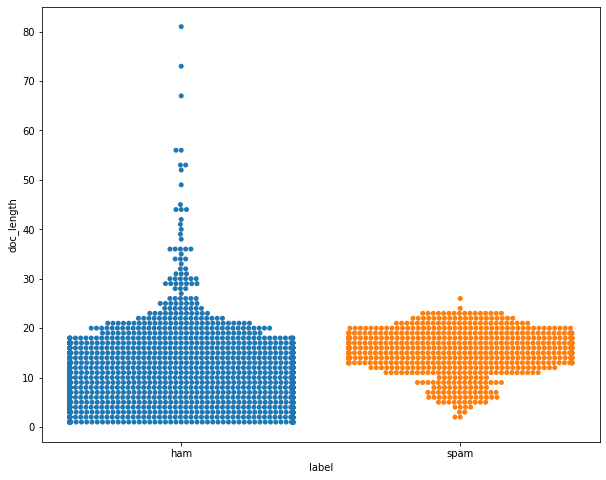

In [96]:
# lets first remove the observations where the doc length is 0

df = df[df.doc_length != 0]

# sns.swarmplot(df.label, df.doc_length)

In [97]:
word_counts

,all,ham,spam
008704050406,2,0,2
0089my,1,0,1
0121,1,0,1
01223585236,1,0,1
01223585334,2,0,2
...,...,...,...
zoe,2,1,1
zogtorius,1,1,0
zoom,1,1,0
zouk,1,0,1


Text(0.5, 1.0, 'Proportion of Spam vs Ham for the 20 most commot words in our text sample')

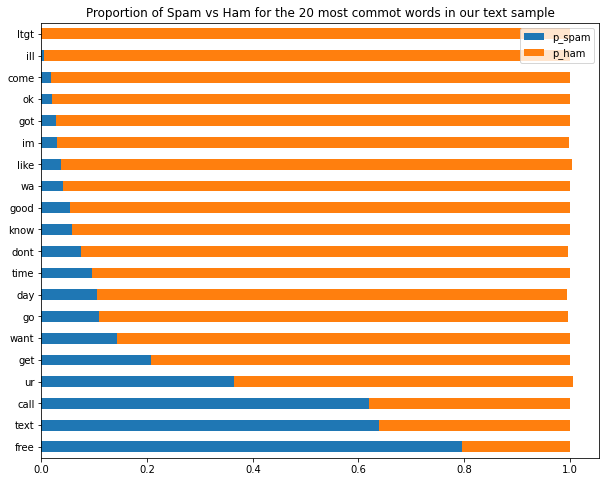

In [101]:
word_counts.assign(p_spam = word_counts.spam/word_counts['all'],
                  p_ham = word_counts.ham/word_counts['all']).sort_values(by = 'all')[['p_spam', 'p_ham']]\
.tail(20).sort_values('p_ham').plot.barh(stacked = True)
    
plt.title('Proportion of Spam vs Ham for the 20 most commot words in our text sample')

In [108]:
word_counts.assign(p_spam = word_counts.spam/word_counts['all'],
                  p_ham = word_counts.ham/word_counts['all']).sort_values('all')[['p_spam', 'p_ham']].tail(20).sort_values('p_ham')#.plot(kind = 'barh', stacked = True)

,p_spam,p_ham
free,0.795833,0.204167
text,0.638614,0.361386
call,0.620690,0.379310
ur,0.364431,0.641399
get,0.207977,0.792023
want,0.142077,0.857923
go,0.109756,0.886179
day,0.105023,0.890411
time,0.095960,0.904040
dont,0.073930,0.922179


**Word Clouds**

- The wordcloud allows you to identify the relative frequency of different keywords using an easily digestible visual.
    
**Common Use Cases**

- As a visualization technique, this method gives a more qualitative analysis of the topics in the documents.

**Pros**

- It’s intuitive and easy to comprehend.
- It helps identify overall respondent sentiment and the specific factors that drive it.
- It provides direction for further analysis.

**Cons**

- It fails to measure each word’s value in and of itself.
- It allows irrelevant words to appear.
- When words appear similar in size, it becomes difficult to differentiate them.



In [48]:
from wordcloud import WordCloud

In [111]:
ham_words

'go jurong point crazy available bugisgreat world labuffet cine got amore wat ok lar joking wifonidun say early horc already say nah dont think go usf life around though even brother like speak treat like aid patent per request melle melle oru minnaminunginte nurungu vettam ha set callertune caller presscopy friend callertune im gonna home soon dont want talk stuff anymore tonightive cried enough today ive searching right word thank breather promise wont take help granted fulfil promise wonderful blessing time date sunday oh kim watching ehrememberspell name yesnaughty makewet fine thataos wayfeel thataos way gotaseriously spell name ium going trymonth ha ha joking pay first lar da stock comin aft finish lunch go str lor ardsmth lorfinish ur lunch already ffffffffff alright way meet sooner forced eat slice im really hungry tho suck mark getting worried know im sick turn pizza lol lol always convincing catch bus frying egg make tea eating mom left dinner feel love im back amp packing ca

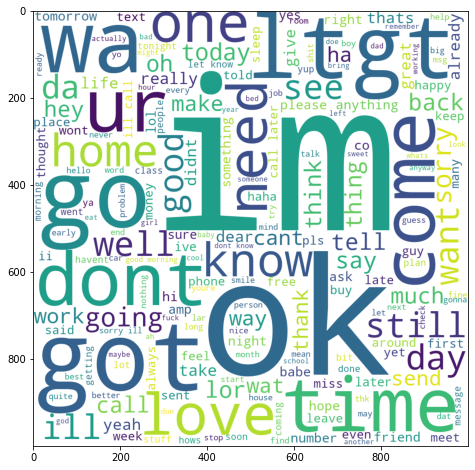

In [114]:
ham_cloud = WordCloud(background_color = 'white', height = 1000, width = 1000).generate(ham_words)

plt.imshow(ham_cloud)

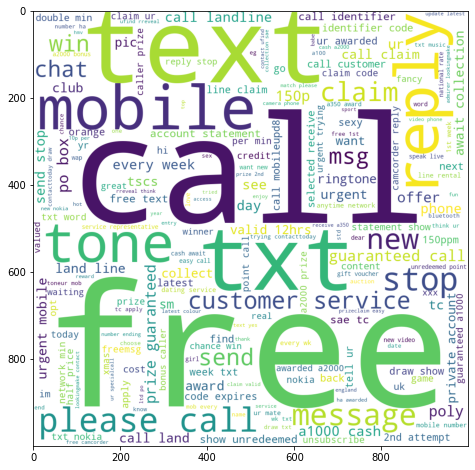

In [116]:
spam_cloud = WordCloud(background_color = 'white', height = 1000, width = 1000).generate(spam_words)
plt.imshow(spam_cloud)

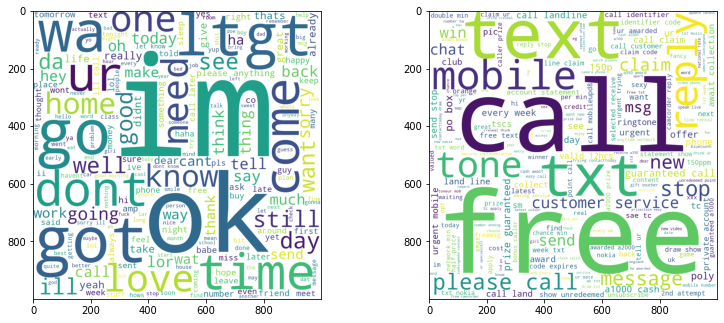

In [134]:
axs = plt.axes([0.25,1,.5,.5]), plt.axes([0.8,1,.5,.5])

axs[0].imshow(ham_cloud)
axs[1].imshow(spam_cloud)

**Bigrams**

Bigrams are a specific instance of the broader concept of n-grams, which is a way to combine words together. This lets us measure not just the individual word frequency, but also takes into account which words appear together.

To produce the bigrams, we'll use nltk.

In [136]:
# creating a bigram column that holds the bigram of the words in each observation

df['bigrams'] = [list(nltk.ngrams(wordlist, 2)) for wordlist in df.words]
df.head()

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,label,text,text_cleaned,text_tokenized,text_lemmatized,text_filtered,words,doc_length,bigrams
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...,go until jurong point crazy available only in ...,go until jurong point crazy available only in ...,go jurong point crazy available bugis n great ...,"[go, jurong, point, crazy, available, bugisgre...",12,"[(go, jurong), (jurong, point), (point, crazy)..."
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,ok lar joking wif u oni,ok lar joking wif u oni,ok lar joking wif u oni,"[ok, lar, joking, wifoni]",4,"[(ok, lar), (lar, joking), (joking, wifoni)]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry 2 wkly comp win fa cup final tkts 2...,"[free, entrywkly, comp, win, fa, cup, final, t...",21,"[(free, entrywkly), (entrywkly, comp), (comp, ..."
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say,u dun say so early hor u c already then say,u dun say so early hor u c already then say,u dun say early hor u c already say,"[u, dun, say, early, horc, already, say]",7,"[(u, dun), (dun, say), (say, early), (early, h..."
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...,nah i dont think he goes to usf he lives aroun...,nah i dont think he go to usf he life around h...,nah dont think go usf life around though,"[nah, dont, think, go, usf, life, around, though]",8,"[(nah, dont), (dont, think), (think, go), (go,..."


In [138]:
# lets create a bigrams of all of the text in ham and all of the text in spam

ham_bigrams = pd.Series(list(nltk.ngrams(ham_words.split(), 2))).value_counts().head(20)
spam_bigrams = pd.Series(list(nltk.ngrams(spam_words.split(), 2))).value_counts().head(20)
spam_bigrams

(please, call)          43
(customer, service)     27
(po, box)               23
(guaranteed, call)      23
(prize, guaranteed)     22
(a1000, cash)           20
(send, stop)            19
(every, week)           19
(urgent, mobile)        18
(land, line)            18
(await, collection)     18
(valid, 12hrs)          17
(account, statement)    16
(sae, tc)               16
(claim, call)           16
(call, customer)        15
(call, mobileupd8)      15
(call, 08000930705)     15
(reply, call)           15
(selected, receive)     15
dtype: int64

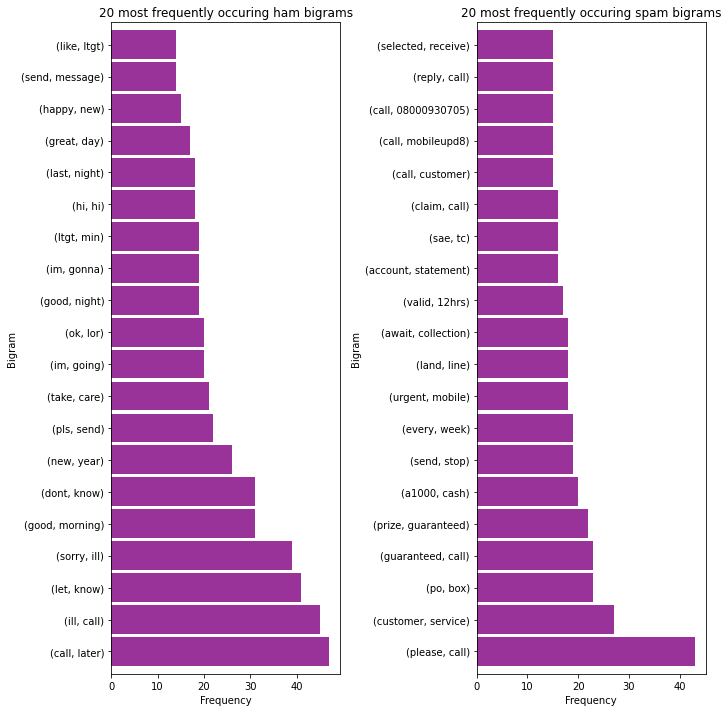

In [142]:
# lets plot these bigrams 

plt.subplot(121)
ham_bigrams.plot.barh(color = 'purple', width = 0.9, figsize = (10,10), alpha = 0.8)
plt.title('20 most frequently occuring ham bigrams')
plt.ylabel('Bigram')
plt.xlabel('Frequency')

plt.subplot(122)
spam_bigrams.plot.barh(color = 'purple', width = 0.9, figsize = (10,10), alpha = 0.8)
plt.title('20 most frequently occuring spam bigrams')
plt.ylabel('Bigram')
plt.xlabel('Frequency')
plt.tight_layout()

In [143]:
# lets explore tri-grams
ham_trigrams = pd.Series(list(nltk.ngrams(ham_words.split(), 3))).value_counts().head(20)
spam_trigrams = pd.Series(list(nltk.ngrams(spam_words.split(), 3))).value_counts().head(20)
spam_trigrams

(prize, guaranteed, call)              21
(call, customer, service)              15
(land, line, claim)                    14
(reply, call, 08000930705)             13
(2003, account, statement)             13
(private, 2003, account)               13
(camcorder, reply, call)               12
(guaranteed, a1000, cash)              12
(show, 800, unredeemed)                12
(anytime, network, min)                11
(every, week, txt)                     11
(bonus, caller, prize)                 11
(cash, await, collection)              10
(customer, service, representative)    10
(a2000, bonus, caller)                 10
(please, call, customer)               10
(txt, music, 87066)                     9
(a2000, prize, guaranteed)              9
(draw, txt, music)                      9
(free, 1st, week)                       9
dtype: int64

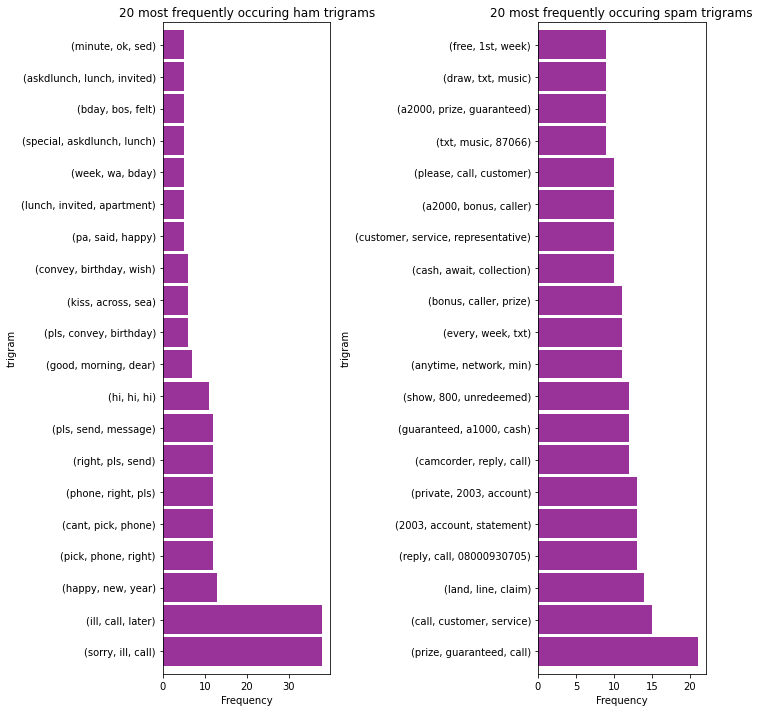

In [144]:
# lets plot these trigrams 

plt.subplot(121)
ham_trigrams.plot.barh(color = 'purple', width = 0.9, figsize = (10,10), alpha = 0.8)
plt.title('20 most frequently occuring ham trigrams')
plt.ylabel('trigram')
plt.xlabel('Frequency')

plt.subplot(122)
spam_trigrams.plot.barh(color = 'purple', width = 0.9, figsize = (10,10), alpha = 0.8)
plt.title('20 most frequently occuring spam trigrams')
plt.ylabel('trigram')
plt.xlabel('Frequency')
plt.tight_layout()

**Takeaways:**
- The spam trigrams are instantly recognizable as spam because of the frequent use of words like guranteed, cash, call, guranteed


In [8]:
# lets import the necessary modules

import acquire
import prepare
import re

In [2]:
# reading the news articles

news_df = acquire.get_news_articles()

In [18]:
# taking a quick look at the data

news_df.head()

In [4]:
# preparing the data using the prepare_data function in prepare module
news_df = prepare.prepare_data(news_df, 'content')

In [6]:
# taking a quick peek of the prepared data
news_df.head()

,topic,title,author,content,clean,stemmed,lemmatized
0,business,"Lakshmi Vilas Bank withdrawals capped at ₹25,0...",Pragya Swastik,The Centre has imposed a 30-day moratorium on ...,centre imposed 30day moratorium lakshmi vilas ...,centr impos 30day moratorium lakshmi vila bank...,centre imposed 30day moratorium lakshmi vila b...
1,business,Pfizer shares drop 4.5% as Moderna says its va...,Krishna Veera Vanamali,Pfizer’s shares fell as much as 4.5% on Monday...,pfizers shares fell much 45 monday rival moder...,pfizer share fell much 45 monday rival moderna...,pfizers share fell much 45 monday rival modern...
2,business,Shutting Delhi markets may prove counterproduc...,Sakshita Khosla,Traders' body CAIT on Tuesday said a proposal ...,traders body cait tuesday said proposal impose...,trader bodi cait tuesday said propos impos loc...,trader body cait tuesday said proposal impose ...
3,business,How does Moderna's COVID-19 vaccine candidate ...,Pragya Swastik,Moderna's initial results of late-stage trial ...,modernas initial results latestage trial show ...,moderna initi result latestag trial show covid...,modernas initial result latestage trial show c...
4,business,"Musk gets $15bn richer in 2 hours, becomes wor...",Krishna Veera Vanamali,Billionaire Elon Musk added $15 billion to his...,billionaire elon musk added 15 billion wealth ...,billionair elon musk ad 15 billion wealth two ...,billionaire elon musk added 15 billion wealth ...


In [11]:
# lets remove unnecessary characters from the test and then split it to get the list of the list of words

words = [re.sub(r'([^a-z0-9\s]|\s.\s)','',doc).split() for doc in news_df.lemmatized]

In [15]:
# add that list to the dataframe

news_df = pd.concat([news_df, pd.DataFrame({'words':words})], axis = 1)

In [23]:
# lets check how our dataframe looks
news_df.head()

,topic,title,author,content,clean,stemmed,lemmatized,words
0,business,"Lakshmi Vilas Bank withdrawals capped at ₹25,0...",Pragya Swastik,The Centre has imposed a 30-day moratorium on ...,centre imposed 30day moratorium lakshmi vilas ...,centr impos 30day moratorium lakshmi vila bank...,centre imposed 30day moratorium lakshmi vila b...,"[centre, imposed, 30day, moratorium, lakshmi, ..."
1,business,Pfizer shares drop 4.5% as Moderna says its va...,Krishna Veera Vanamali,Pfizer’s shares fell as much as 4.5% on Monday...,pfizers shares fell much 45 monday rival moder...,pfizer share fell much 45 monday rival moderna...,pfizers share fell much 45 monday rival modern...,"[pfizers, share, fell, much, 45, monday, rival..."
2,business,Shutting Delhi markets may prove counterproduc...,Sakshita Khosla,Traders' body CAIT on Tuesday said a proposal ...,traders body cait tuesday said proposal impose...,trader bodi cait tuesday said propos impos loc...,trader body cait tuesday said proposal impose ...,"[trader, body, cait, tuesday, said, proposal, ..."
3,business,How does Moderna's COVID-19 vaccine candidate ...,Pragya Swastik,Moderna's initial results of late-stage trial ...,modernas initial results latestage trial show ...,moderna initi result latestag trial show covid...,modernas initial result latestage trial show c...,"[modernas, initial, result, latestage, trial, ..."
4,business,"Musk gets $15bn richer in 2 hours, becomes wor...",Krishna Veera Vanamali,Billionaire Elon Musk added $15 billion to his...,billionaire elon musk added 15 billion wealth ...,billionair elon musk ad 15 billion wealth two ...,billionaire elon musk added 15 billion wealth ...,"[billionaire, elon, musk, added, 15, billion, ..."


In [33]:
# lets join all of the words in business category together

business_words = ' '.join(news_df[news_df.topic == 'business'].lemmatized)
sports_words = ' '.join(news_df[news_df.topic == 'sports'].lemmatized)
technology_words = ' '.join(news_df[news_df.topic == 'technology'].lemmatized)
entertainment_words = ' '.join(news_df[news_df.topic == 'entertainment'].lemmatized)
all_words = ' '.join(news_df.lemmatized)


In [34]:
# lets split all of the words in each category and convert it to pandas series and get a value count

business_freq = pd.Series(business_words.split()).value_counts()
sports_freq = pd.Series(sports_words.split()).value_counts()
technology_freq = pd.Series(technology_words.split()).value_counts()
entertainment_freq = pd.Series(entertainment_words.split()).value_counts()
all_freq = pd.Series(all_words.split()).value_counts()

In [36]:
# lets create a dataframe that holds the word counts for each category 

words_count = (pd.concat([all_freq, business_freq, sports_freq, technology_freq, entertainment_freq], axis = 1,sort = True)\
.set_axis(['all', 'business', 'sports', 'technology', 'entertainment'], axis = 1)\
.fillna(0)
.apply(lambda s:s.astype(int))
)

In [38]:
words_count.head()

,all,business,sports,technology,entertainment
1,1,0,0,0,1
10,3,3,0,0,0
100,3,1,2,0,0
100000,1,0,0,1,0
103,1,1,0,0,0


In [40]:
words_count.sort_values('all', ascending = False).head(10)

,all,business,sports,technology,entertainment
said,65,17,16,15,17
added,28,5,5,5,13
india,25,7,14,2,2
u,22,3,2,15,2
film,22,0,0,4,18
australia,18,0,18,0,0
actor,18,0,0,0,18
monday,17,10,3,4,0
year,15,9,1,3,2
test,14,0,11,3,0


**Takeaways:**
- There are few words like `actor`, `australia` that is distinctively used in one category whereas there is word like `said` used almost evenly between different categories


In [52]:
news_df['doc_length'] = [len(word_list) for word_list in news_df.words]

<AxesSubplot:xlabel='topic', ylabel='doc_length'>

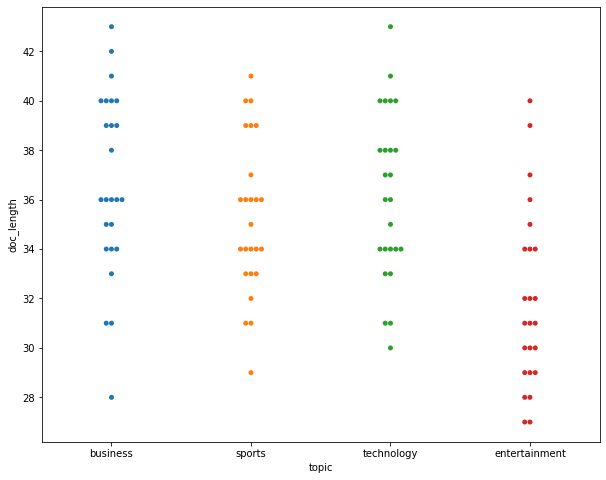

In [53]:
sns.swarmplot(news_df.topic, news_df.doc_length)

In [55]:
# lets check if there are any 0 for doc length
news_df.doc_length.value_counts()

34    16
36    13
40    11
31     9
39     7
33     6
35     5
38     5
29     4
37     4
32     4
30     4
41     3
28     3
43     2
27     2
42     1
Name: doc_length, dtype: int64

**lets visualize using word cloud**
- We will vizualize the cloud individually at first and then we will vizualize them together in one figure

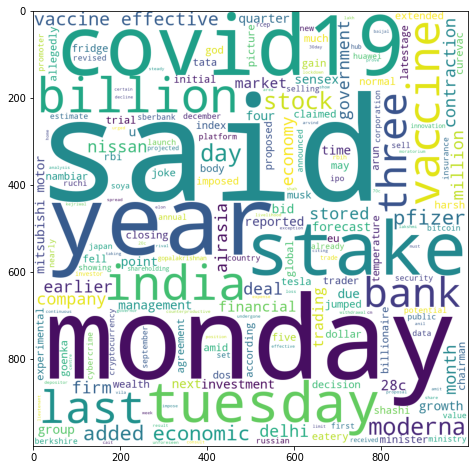

In [56]:
# creating the cloud and generating the word cloud using business words

business_cloud = WordCloud(background_color = 'white', height = 1000, width = 1000 ).generate(business_words)
plt.imshow(business_cloud)

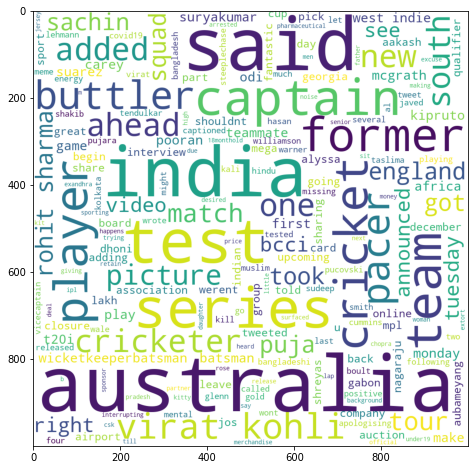

In [58]:
# creating the cloud and generating the word cloud using sports words

sports_cloud = WordCloud(background_color = 'white', height = 1000, width = 1000).generate(sports_words)
plt.imshow(sports_cloud)

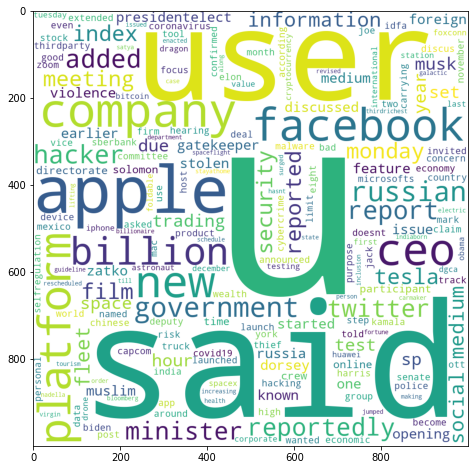

In [59]:
# creating the cloud and generating the word cloud using technology words

technology_cloud = WordCloud(background_color = 'white', height = 1000, width = 1000).generate(technology_words)
plt.imshow(technology_cloud)

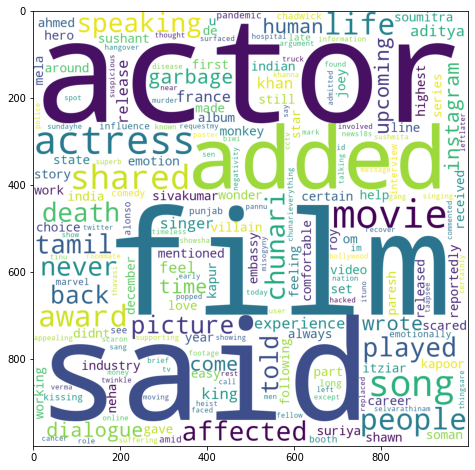

In [75]:
# creating the cloud and generating the word cloud using entertainment words

entertainment_cloud = WordCloud(background_color = 'white', height = 1000, width = 1000).generate(entertainment_words)
plt.imshow(entertainment_cloud)

Text(0.5, 1.0, 'Entertainment Cloud')

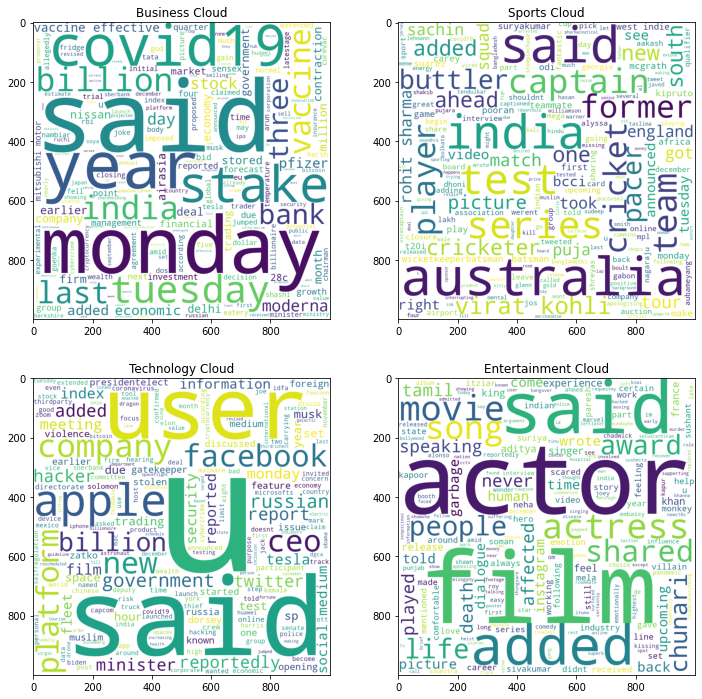

In [74]:
# lets plot these cloud all together

fig, axes = plt.subplots(2,2, figsize = (12,12))
axes[0,0].imshow(business_cloud)
axes[0,0].set_title('Business Cloud')

axes[0,1].imshow(sports_cloud)
axes[0,1].set_title('Sports Cloud')

axes[1,0].imshow(technology_cloud)
axes[1,0].set_title('Technology Cloud')

axes[1,1].imshow(entertainment_cloud)
axes[1,1].set_title('Entertainment Cloud')

In [78]:
# lets get some bigrams

news_df['bigrams'] = [list(nltk.ngrams(wordlist, 2)) for wordlist in news_df.words]

In [79]:
news_df

,topic,title,author,content,clean,stemmed,lemmatized,words,doc_length,bigrams
0,business,"Lakshmi Vilas Bank withdrawals capped at ₹25,0...",Pragya Swastik,The Centre has imposed a 30-day moratorium on ...,centre imposed 30day moratorium lakshmi vilas ...,centr impos 30day moratorium lakshmi vila bank...,centre imposed 30day moratorium lakshmi vila b...,"[centre, imposed, 30day, moratorium, lakshmi, ...",31,"[(centre, imposed), (imposed, 30day), (30day, ..."
1,business,Pfizer shares drop 4.5% as Moderna says its va...,Krishna Veera Vanamali,Pfizer’s shares fell as much as 4.5% on Monday...,pfizers shares fell much 45 monday rival moder...,pfizer share fell much 45 monday rival moderna...,pfizers share fell much 45 monday rival modern...,"[pfizers, share, fell, much, 45, monday, rival...",34,"[(pfizers, share), (share, fell), (fell, much)..."
2,business,Shutting Delhi markets may prove counterproduc...,Sakshita Khosla,Traders' body CAIT on Tuesday said a proposal ...,traders body cait tuesday said proposal impose...,trader bodi cait tuesday said propos impos loc...,trader body cait tuesday said proposal impose ...,"[trader, body, cait, tuesday, said, proposal, ...",42,"[(trader, body), (body, cait), (cait, tuesday)..."
3,business,How does Moderna's COVID-19 vaccine candidate ...,Pragya Swastik,Moderna's initial results of late-stage trial ...,modernas initial results latestage trial show ...,moderna initi result latestag trial show covid...,modernas initial result latestage trial show c...,"[modernas, initial, result, latestage, trial, ...",38,"[(modernas, initial), (initial, result), (resu..."
4,business,"Musk gets $15bn richer in 2 hours, becomes wor...",Krishna Veera Vanamali,Billionaire Elon Musk added $15 billion to his...,billionaire elon musk added 15 billion wealth ...,billionair elon musk ad 15 billion wealth two ...,billionaire elon musk added 15 billion wealth ...,"[billionaire, elon, musk, added, 15, billion, ...",40,"[(billionaire, elon), (elon, musk), (musk, add..."
...,...,...,...,...,...,...,...,...,...,...
94,entertainment,I'm grateful for the honour: Sood on being nam...,Kriti Sharma,"Actor Sonu Sood, who has been appointed as the...",actor sonu sood appointed state icon punjab el...,actor sonu sood appoint state icon punjab elec...,actor sonu sood appointed state icon punjab el...,"[actor, sonu, sood, appointed, state, icon, pu...",27,"[(actor, sonu), (sonu, sood), (sood, appointed..."
95,entertainment,Kissing Booth 3 is going to be released in sum...,Kriti Sharma,While accepting the award for Comedy Movie Sta...,accepting award comedy movie star 2020 peoples...,accept award comedi movi star 2020 peopl choic...,accepting award comedy movie star 2020 people ...,"[accepting, award, comedy, movie, star, 2020, ...",30,"[(accepting, award), (award, comedy), (comedy,..."
96,entertainment,Wonder if people will take the risk: Dilijt on...,Kriti Sharma,Commenting on the theatrical release of his fi...,commenting theatrical release film suraj pe ma...,comment theatric releas film suraj pe mangal b...,commenting theatrical release film suraj pe ma...,"[commenting, theatrical, release, film, suraj,...",34,"[(commenting, theatrical), (theatrical, releas..."
97,entertainment,Feel like you've gone for a long shoot: Irrfan...,Kriti Sharma,"Irrfan Khan's son Babil Khan, on Sunday, poste...",irrfan khans son babil khan sunday posted pict...,irrfan khan son babil khan sunday post pictur ...,irrfan khan son babil khan sunday posted pictu...,"[irrfan, khan, son, babil, khan, sunday, poste...",32,"[(irrfan, khan), (khan, son), (son, babil), (b..."


In [84]:
business_bigrams = pd.Series(list(nltk.ngrams(business_words.split(), 2))).value_counts().head(20)

In [86]:
sports_bigrams = pd.Series(list(nltk.ngrams(sports_words.split(), 2))).value_counts().head(20)

technology_bigrams = pd.Series(list(nltk.ngrams(technology_words.split(), 2))).value_counts().head(20)

entertainment_bigrams = pd.Series(list(nltk.ngrams(entertainment_words.split(), 2))).value_counts().head(20)

<AxesSubplot:>

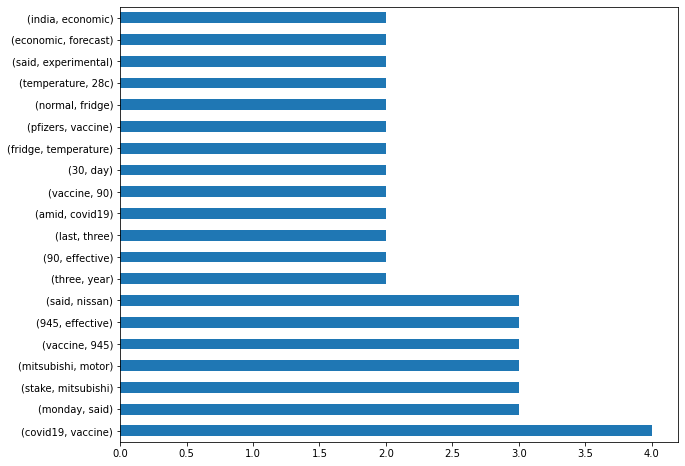

In [87]:
business_bigrams.plot(kind = 'barh')

<AxesSubplot:>

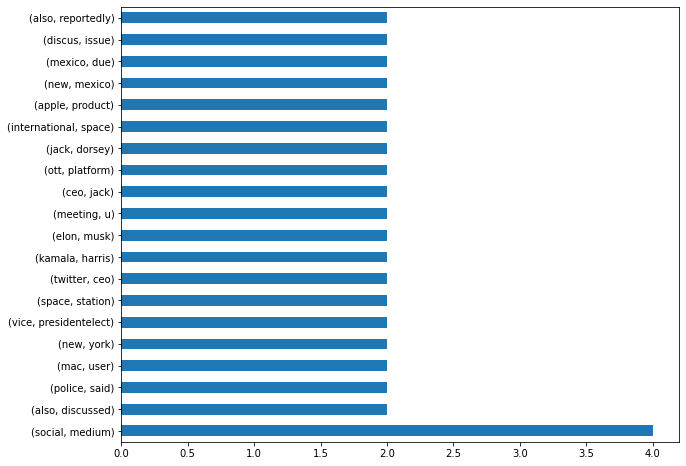

In [88]:
technology_bigrams.plot(kind = 'barh')

<AxesSubplot:>

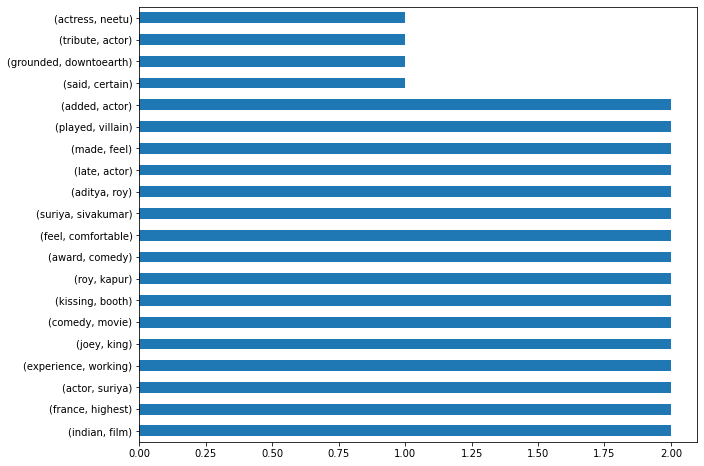

In [89]:
entertainment_bigrams.plot(kind = 'barh')

<AxesSubplot:>

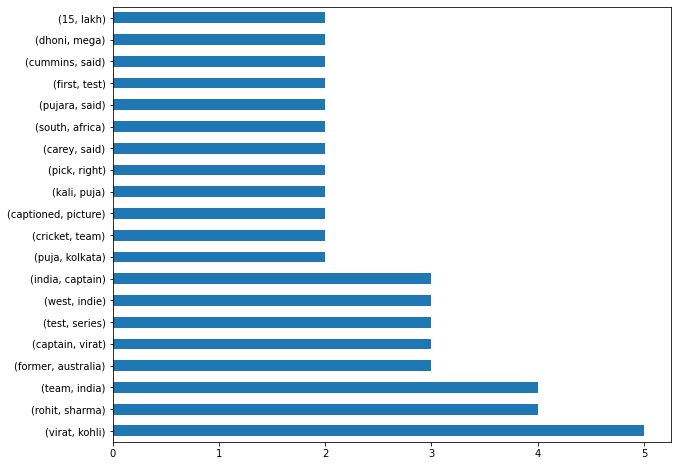

In [90]:
sports_bigrams.plot(kind = 'barh')

In [111]:
# trying to plot the business bigrams in word cloud

data = {k[0] + ' ' + k[1]: v for k, v in business_bigrams.to_dict().items()}

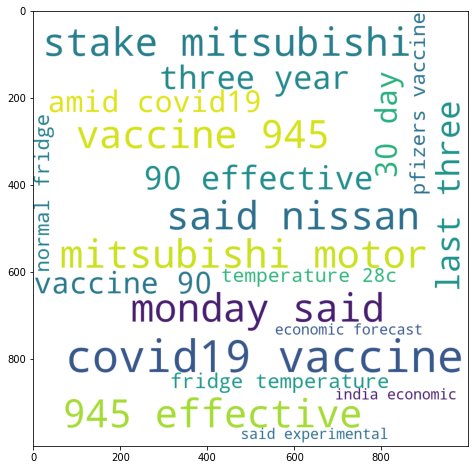

In [112]:
cloud_business = WordCloud(background_color = 'white', height = 1000, width = 1000).generate_from_frequencies(data)
plt.imshow(cloud_business)